# Introduction to data

Some define **Statistics** as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information - the data. In this lab, you will gain insight into public health by generating simple graphical and numerical summaries of a data set collected by the Centers for Disease Control and Prevention (CDC).

## Getting started

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS's [website](http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

We begin by importing the dataset of 20,000 observations from the Cloud.

In [1]:
# name of the dataset to be imported from our GitHub account
df_name = 'brfss_2000.csv'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/' + df_name
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [3]:
df.shape

(20000, 9)

In [4]:
# rename df to "cdc" for consistency
cdc = df
cdc.sample(10, random_state=999)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
6743,1,1,0,71,170,170,23,m,very good
19360,1,0,1,64,120,117,45,f,very good
8104,1,1,1,70,192,170,64,m,good
8535,1,1,1,64,165,140,67,f,excellent
8275,1,1,0,69,130,140,69,m,very good
3511,0,1,0,63,128,128,37,f,very good
1521,1,1,0,68,176,135,37,f,good
976,0,1,1,64,150,125,43,f,fair
14484,1,1,1,68,185,185,78,m,good
3591,1,1,0,71,165,175,34,m,fair


The data set `cdc` that shows up is a data matrix, with each row representing a case and each column representing a variable. These kind of data format are called data frame, which is a term that will be used throughout the labs.

To view the names of the variables, use `columns.values`

In [5]:
cdc.columns.values

array(['exerany', 'hlthplan', 'smoke100', 'height', 'weight', 'wtdesire',
       'age', 'gender', 'genhlth'], dtype=object)

This returns the names `genhlth`, `exerany`, `hlthplan`, `smoke100`, `height`, `weight`, `wtdesire`, `age`, and `gender`. Each one of these variables corresponds to a question that was asked in the survey. For example, for `genhlth`, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The `exerany` variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, `hlthplan` indicates whether the respondent had some form of health coverage (1) or did not (0). The `smoke100` variable indicates whether the respondent had smoked at least 100 cigarettes in their lifetime. The other variables record the respondent's `height` in inches, `weight` in pounds as well as their desired weight, `wtdesire`, `age` in years, and `gender`.

<div class = 'exercise'>
<h4>Exercise 1</h4>
How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).
</div>

We can have a look at the first few entries (rows) of our data with the command

In [6]:
cdc.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


and similarly we can look at the last few by typing.

In [7]:
cdc.tail()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
19995,1,1,0,66,215,140,23,f,good
19996,0,1,0,73,200,185,35,m,excellent
19997,0,1,0,65,216,150,57,f,poor
19998,1,1,0,67,165,165,81,f,good
19999,1,1,1,69,170,165,83,m,good


You could also look at all of the data frame at once by typing its name into the console, but that might be unwise here. We know `cdc` has 20,000 rows, so viewing the entire data set would mean flooding your screen. It's better to take small peeks at the data with `head`, `tail` or the subsetting techniques that you'll learn in a moment.

## Summaries and tables

The BRFSS questionnaire is a massive trove of information. A good first step in any analysis is to distill all of that information into a few summary statistics and graphics. As a simple example, the function `describe` returns a numerical summary: count, mean, standard deviation, minimum, first quartile, median, third quartile, and maximum. For `weight` this is

In [8]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

If you wanted to compute the interquartile range for the respondents’ weight, you would look at the output from the summary command above and then enter

In [9]:
190 - 140

50

Python also has built-in functions to compute summary statistics one by one.

In [10]:
print('count:', cdc['weight'].count())
print('mean: ', cdc['weight'].mean())
print('std:  ', cdc['weight'].std())
print('var:  ', cdc['weight'].var())
print('min:  ', cdc['weight'].min())
print('25%:  ', cdc['weight'].quantile(0.25))
print('50%:  ', cdc['weight'].median())  # Remember that the median is also the second quartile 
print('75%:  ', cdc['weight'].quantile(0.75))
print('max:  ', cdc['weight'].max())

count: 20000
mean:  169.68295
std:   40.08096996712
var:   1606.4841535051753
min:   68
25%:   140.0
50%:   165.0
75%:   190.0
max:   500


While it makes sense to describe a quantitative variable like `weight` in terms of these statistics, what about categorical data? We would instead consider the sample frequency or relative frequency distribution. The function `value_counts` does this for you by counting the number of times each kind of response was given. For example, to see the number of people who have smoked 100 cigarettes in their lifetime, type

In [11]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

or instead look at the relative frequency distribution by typing

In [12]:
cdc['smoke100'].value_counts(normalize = True)

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

Notice how Python automatically shows the relative frequency distributions by setting the parameter `normalize` as `True`.

Now let's import `matplotlib` library to create plots. When running Python using the command line, the graphs are typically shown in a separate window. In a Jupyter Notebook, you can simply output the graphs within the notebook itself by running the `%matplotlib` inline magic command.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

You can change the format to svg for better quality figures. You can also try the retina format and see which one looks better on your computer's screen.

In [14]:
%config InlineBackend.figure_format = 'retina'

You can also change the default style of plots. Let's go for our favourite style, `ggplot` from R.

In [15]:
plt.style.use('ggplot')

Let's also make the size of plots and font sizes bigger.

In [16]:
plt.rcParams['figure.figsize'] = (10,5)

In [17]:
plt.rcParams['font.size'] = 12

Now we can make a bar plot of the entries in the table by putting the table inside the barplot command.

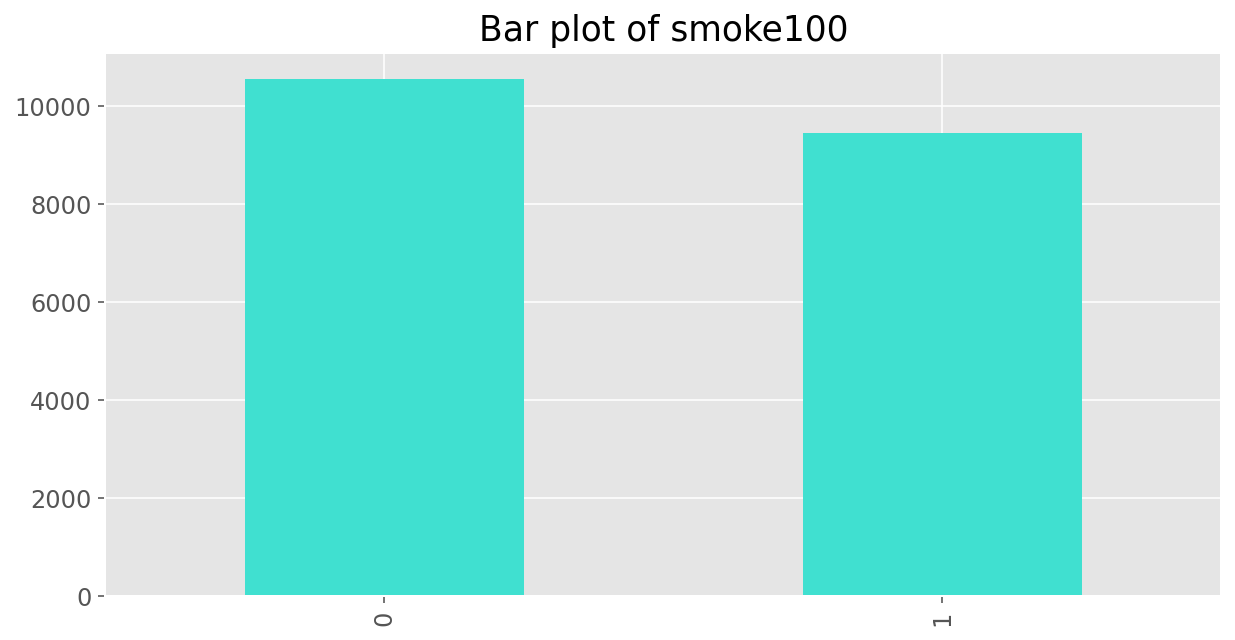

In [18]:
cdc['smoke100'].value_counts().plot(kind = 'bar', color = 'turquoise', title = 'Bar plot of smoke100')
plt.show();

Notice what we’ve done here! We created the bar plot using `kind = bar`. You could also break this into two steps by typing the following:

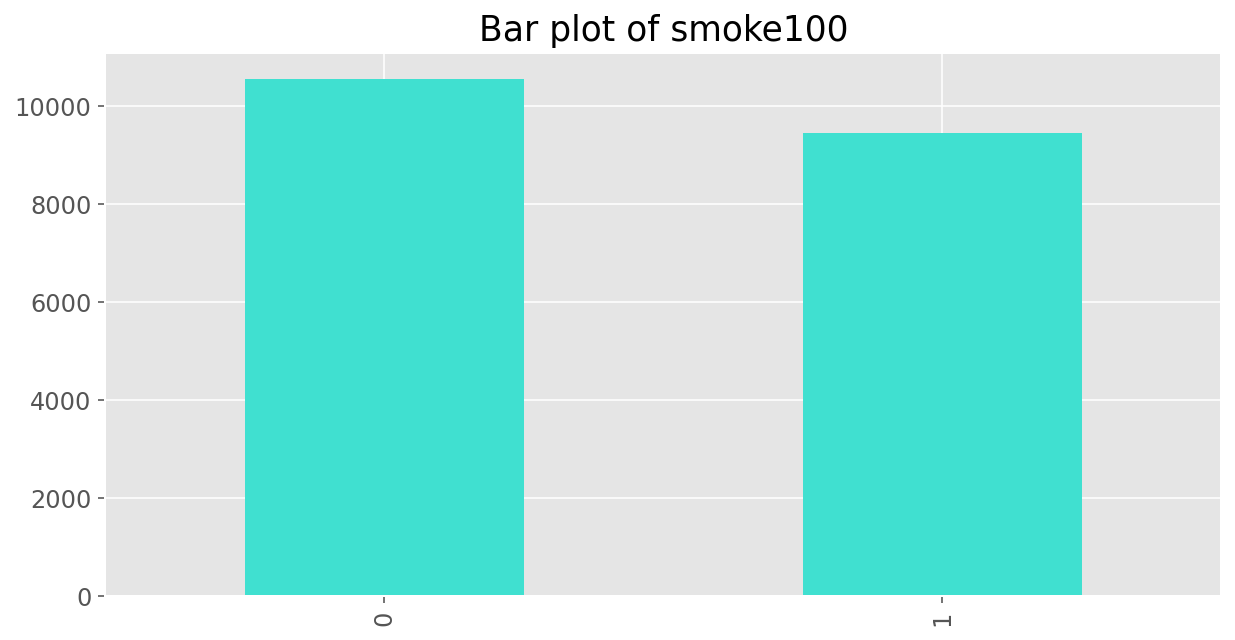

In [19]:
smoke = cdc['smoke100'].value_counts()
smoke.plot(kind = 'bar', color = 'turquoise', title = 'Bar plot of smoke100')
plt.show(); 

Here, we've made a new object, called `smoke` (the contents of which we can see by typing `smoke` into the console) and then used it in as the input for `plot`.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Create a numerical summary for <code>height</code> and <code>age</code>, and compute the interquartile range for each. Compute the relative frequency distribution for <code>gender</code> and <code>exerany</code>. How many males are in the sample? What proportion of the sample reports being in excellent health?
</div>

The `value_counts()` with `groupby` command can be used to tabulate any number of variables that you provide. For example, to examine which participants have smoked across each gender, we could use the following.

In [20]:
cdc.groupby('gender')['smoke100'].value_counts().unstack()  
# By doing unstack we are transforming the last level of the index to the columns. 

smoke100,0,1
gender,,
f,6012,4419
m,4547,5022


Here, we see column labels of 0 and 1. Recall that 1 indicates a respondent has smoked at least 100 cigarettes. The rows refer to gender. To create a mosaic plot of this table, we would enter the following command.

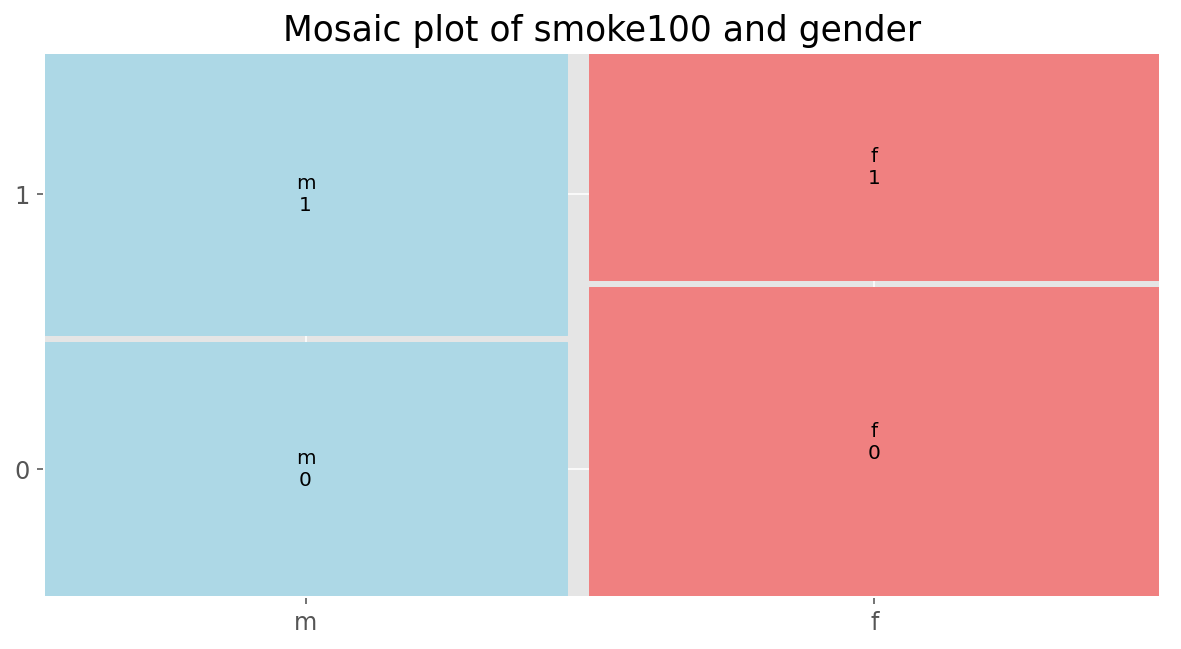

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

gender_colors = lambda key: {'color': 'lightcoral' if 'f' in key else 'lightblue'}
mosaic(cdc, ['gender', 'smoke100'], title='Mosaic plot of smoke100 and gender', 
       properties = gender_colors, gap = 0.02)
plt.show();

<div class = 'exercise'>
<h4>Exercise 3</h4>
What does the mosaic plot reveal about smoking habits and gender?
</div>

## Interlude: How Python thinks about data

DataFrames are like a type of spreadsheet. Each row is a different observation (a different respondent) and each column is a different variable (the first is `genhlth`, the second `exerany` and so on). We can see the size of the DataFrame by typing

In [22]:
cdc.shape

(20000, 9)

which will return the number of rows and columns. Now, if we want to access a subset of the full DataFrame, we can use row-and-column notation. For example, to see the sixth variable of the 567th respondent, use the format

In [23]:
cdc.iloc[566, 5]  # This is the equivalent of cdc[567,6] in R.

190

which gives us the weight of the 567th person (or observation). Remember that, in Python indexing starts at 0, so the first element of a list or DataFrame is selected by the 0-th index.

To see the weights for the first 10 respondents we can type

In [24]:
cdc.iloc[0:10, 5]  # Keep in mind that the ending index is excluded in Python.

0    175
1    115
2    105
3    124
4    130
5    114
6    185
7    160
8    130
9    170
Name: wtdesire, dtype: int64

Finally, if we want all of the data for the first 10 respondents, type

In [25]:
cdc.iloc[0:10,]

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good
5,1,1,0,64,114,114,55,f,very good
6,1,1,0,71,194,185,31,m,very good
7,0,1,0,67,170,160,45,m,very good
8,0,1,1,65,150,130,27,f,good
9,1,1,0,70,180,170,44,m,good


By leaving out an index or a range (we didn't type anything between the comma and the square bracket), we get all the columns. As a rule, we omit the column number to see all columns in a DataFrame. To access all the observations, just leave a colon inside of the bracket. Try the following to see the weights for all 20,000 respondents fly by on your screen

In [26]:
cdc.iloc[:, 5]

0        175
1        115
2        105
3        124
4        130
        ... 
19995    140
19996    185
19997    150
19998    165
19999    165
Name: wtdesire, Length: 20000, dtype: int64

Recall that the sixth column represents respondents' weight, so the command above reported all of the weights in the data set. An alternative method to access the weight data is by referring to the name. Previously, we typed `cdc` to see all the variables contained in the cdc data set. We can use any of the variable names to select items in our data set.

In [27]:
cdc['weight']

0        175
1        125
2        105
3        132
4        150
        ... 
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

This tells Python to look in DataFrame `cdc` for the column called `weight`. Since that's a single vector, we can subset it by just adding another single index inside square brackets. We see the weight for the 567th respondent by typing

In [28]:
cdc['weight'][566]

160

Similarly, for just the first 10 respondents

In [29]:
cdc['weight'][0:10]

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

The command above returns the same result as the `cdc.iloc[0:10, 5]` command.

## A little more on subsetting

It's often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through conditioning commands. First, consider expressions like

In [30]:
cdc['gender'] == 'm'

0         True
1        False
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: gender, Length: 20000, dtype: bool

or

In [31]:
cdc['age'] > 30

0         True
1         True
2         True
3         True
4         True
         ...  
19995    False
19996     True
19997     True
19998     True
19999     True
Name: age, Length: 20000, dtype: bool

These commands produce a series of `TRUE` and `FALSE` values. There is one value for each respondent, where `TRUE` indicates that the person was male (via the first command) or older than 30 (second command).

Suppose we want to extract just the data for the men in the sample, or just for those over 30. For example, the command

In [32]:
mdata = cdc[cdc['gender'] == 'm']

will create a new data set called `mdata` that contains only the men from the `cdc` data set. In addition to finding it in your workspace alongside its dimensions, you can take a peek at the first several rows as usual

In [33]:
mdata.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
6,1,1,0,71,194,185,31,m,very good
7,0,1,0,67,170,160,45,m,very good
9,1,1,0,70,180,170,44,m,good
10,1,1,1,69,186,175,46,m,excellent


We can carve up the data based on values of one or more variables. As an aside, we can use several of these conditions together with `&` and `|`. The `&` is read "and" so that

In [34]:
m_and_over30 = cdc[(cdc['gender'] == 'm') & (cdc['age'] > 30)]
m_and_over30.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
6,1,1,0,71,194,185,31,m,very good
7,0,1,0,67,170,160,45,m,very good
9,1,1,0,70,180,170,44,m,good
10,1,1,1,69,186,175,46,m,excellent


will give you the data for men over the age of 30. The `|` character is read "or" so that

In [35]:
m_or_over30 = cdc[(cdc['gender'] == 'm') | (cdc['age'] > 30)]
m_or_over30.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


will take people who are men or over the age of 30 (why that's an interesting group is hard to say, but right now the mechanics of this are the important thing). In principle, you may use as many "and" and "or" clauses as you like when forming a subset.

<div class = 'exercise'>
<h4>Exercise 4</h4>
Create a new object called <code>under23_and_smoke</code> that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.</div>

## Quantitative data

With our subsetting tools in hand, we'll now return to the task of the day: making basic summaries of the BRFSS questionnaire. We've already looked at categorical data such as `smoke100` and `gender` so now let's turn our attention to quantitative data. Two common ways to visualize quantitative data are with box plots and histograms. We can construct a box plot for a single variable with the following command.

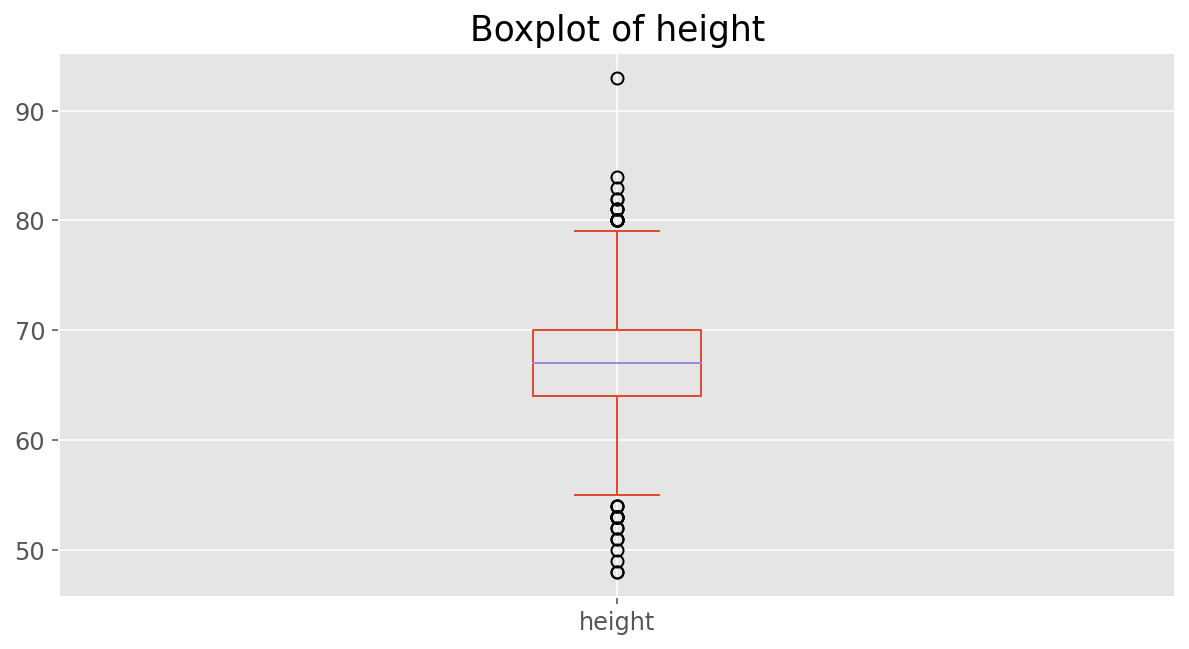

In [36]:
cdc['height'].plot(kind = 'box', title = 'Boxplot of height')
plt.show(); 

We can compare the locations of the components of the box by examining the summary statistics.

In [37]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

Confirm that the median and upper and lower quartiles reported in the numerical summary match those in the graph. The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories. So we can, for example, compare the heights of men and women with

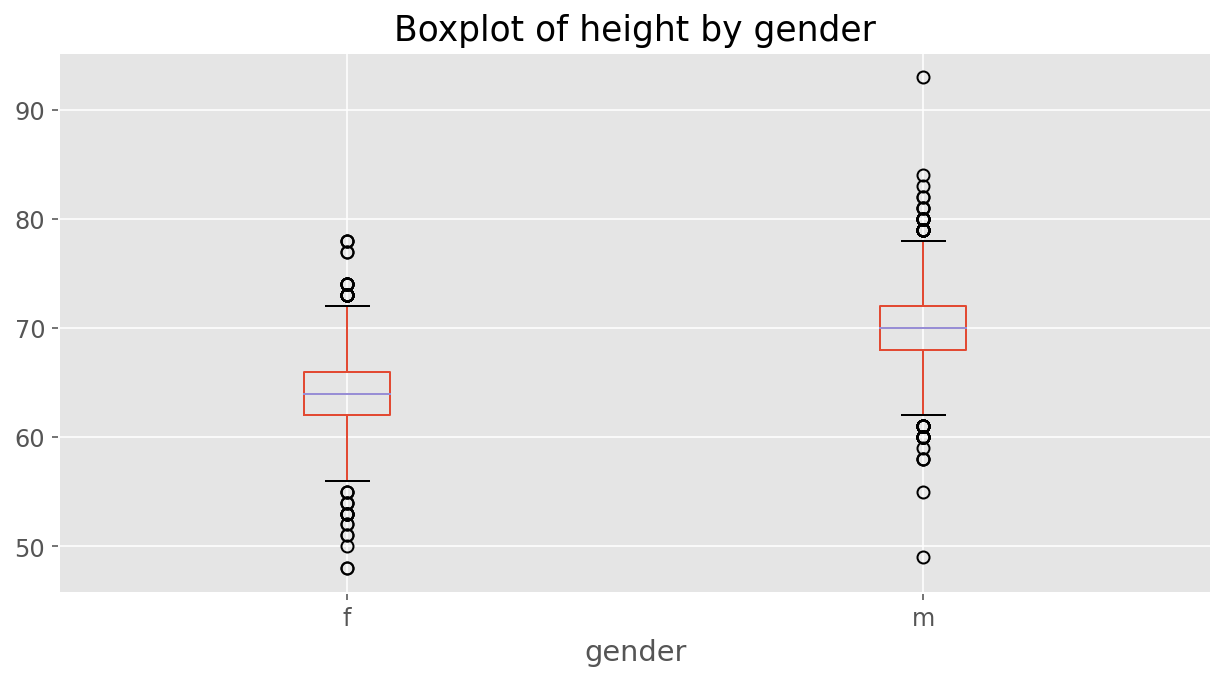

In [38]:
cdc.boxplot(column = 'height', by = 'gender')
plt.title('Boxplot of height by gender')
plt.suptitle('')
plt.show();

Next let's consider a new variable that doesn't show up directly in this data set: Body Mass Index ([BMI](http://en.wikipedia.org/wiki/Body_mass_index)). BMI is a weight to height ratio and can be calculated as:

**BMI** = $\displaystyle\frac{mass_{kg}}{height^2_{m}} = \frac{mass_{lb}}{height^2_{in}}\times703$

703 is the approximate conversion factor to change units from metric (meters and kilograms) to imperial (inches and pounds) units.

The following two lines first make a new object called `bmi` and then creates box plots of these values using `seaborn` library, defining groups by the variable `genhlth`.

In [39]:
bmi = (cdc['weight'] / (cdc['height'])**2) * 703

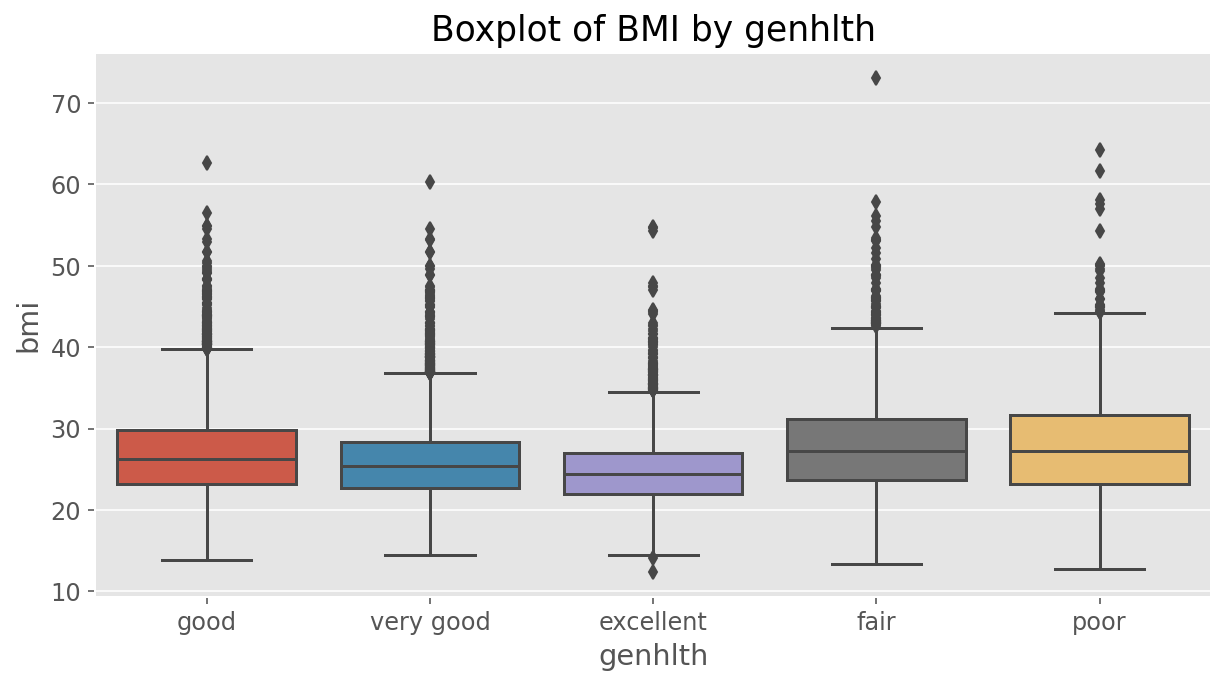

In [40]:
import seaborn as sns

sns.boxplot(x = cdc['genhlth'], y = bmi).set(
    xlabel='genhlth', ylabel='bmi', title = 'Boxplot of BMI by genhlth')
plt.show(); 

Notice that the first line above is just some arithmetic, but it's applied to all 20,000 numbers in the `cdc` data set. That is, for each of the 20,000 participants, we take their weight, divide by their height-squared and then multiply by 703. The result is 20,000 BMI values, one for each respondent.

<div class = 'exercise'>
<h4>Exercise 5</h4>
What does this box plot show? Pick another categorical variable from the data set and see how it relates to BMI. List the variable you chose, why you might think it would have a relationship to BMI, and indicate what the figure seems to suggest.
</div>

Finally, let's make some histograms. We can look at the histogram for the age of our respondents with the command

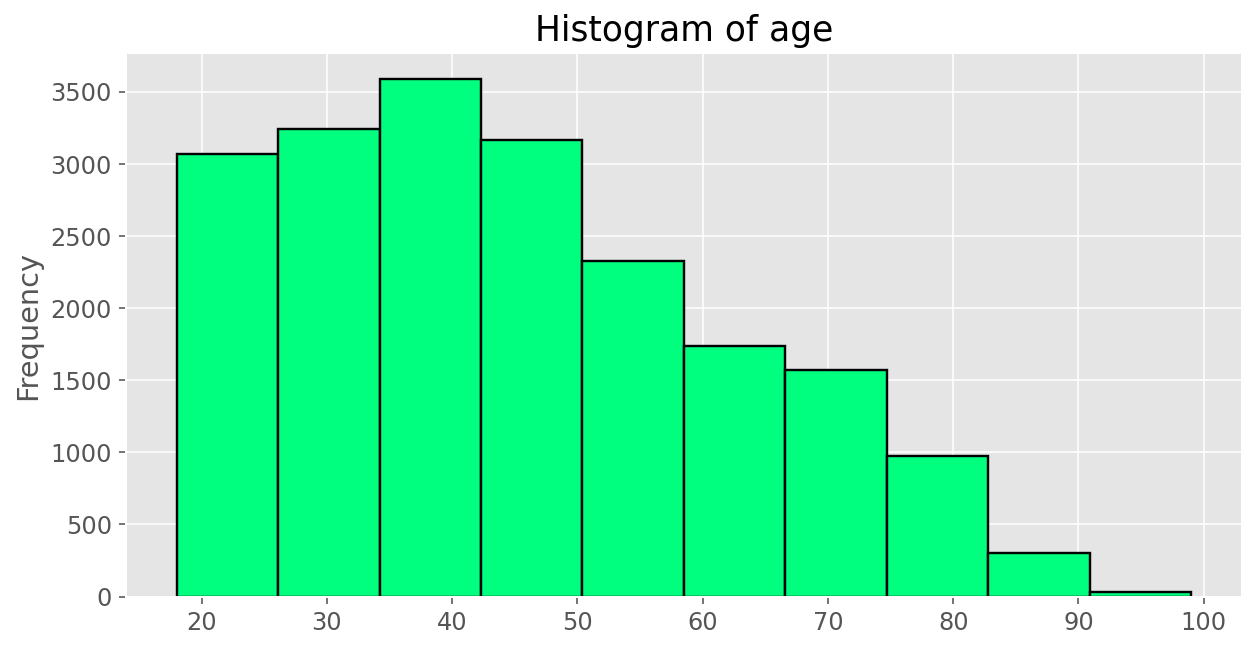

In [41]:
cdc['age'].plot(kind = 'hist', color = 'springgreen', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of age')
plt.show(); 

Histograms are generally a very good way to see the shape of a single distribution, but that shape can change depending on how the data is split between the different bins. You can control the number of bins by adding an argument to the command. In the next two lines, we first make a default histogram of `bmi` and then one with the bin size of 50.

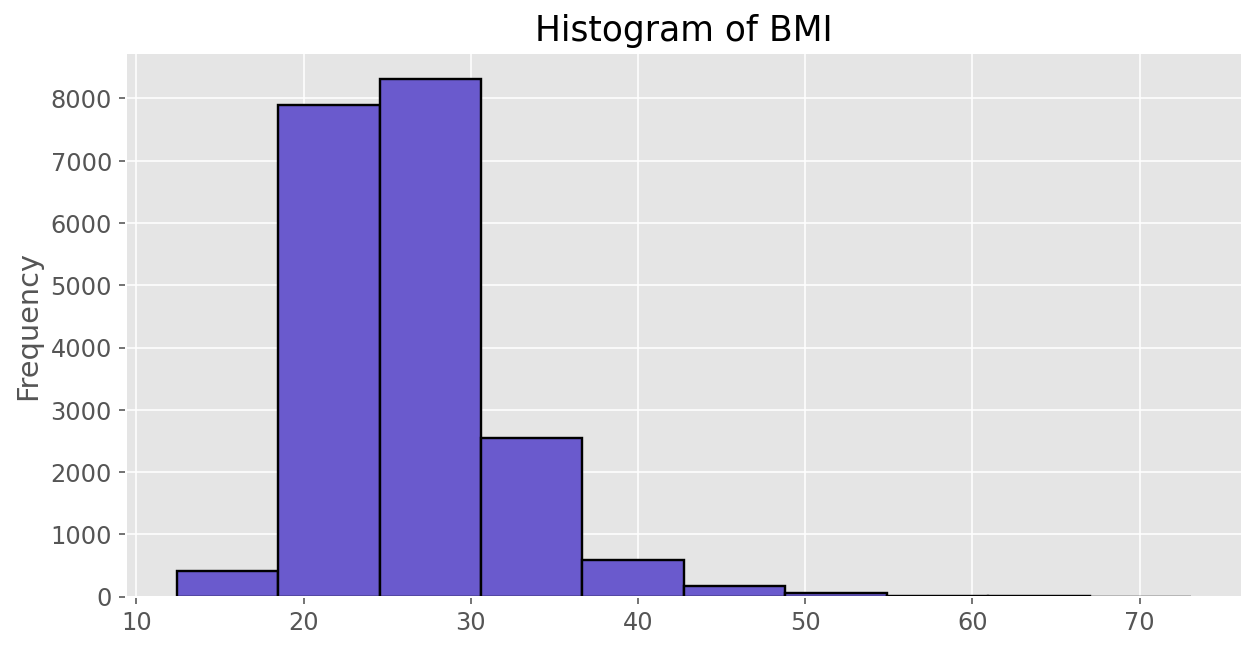

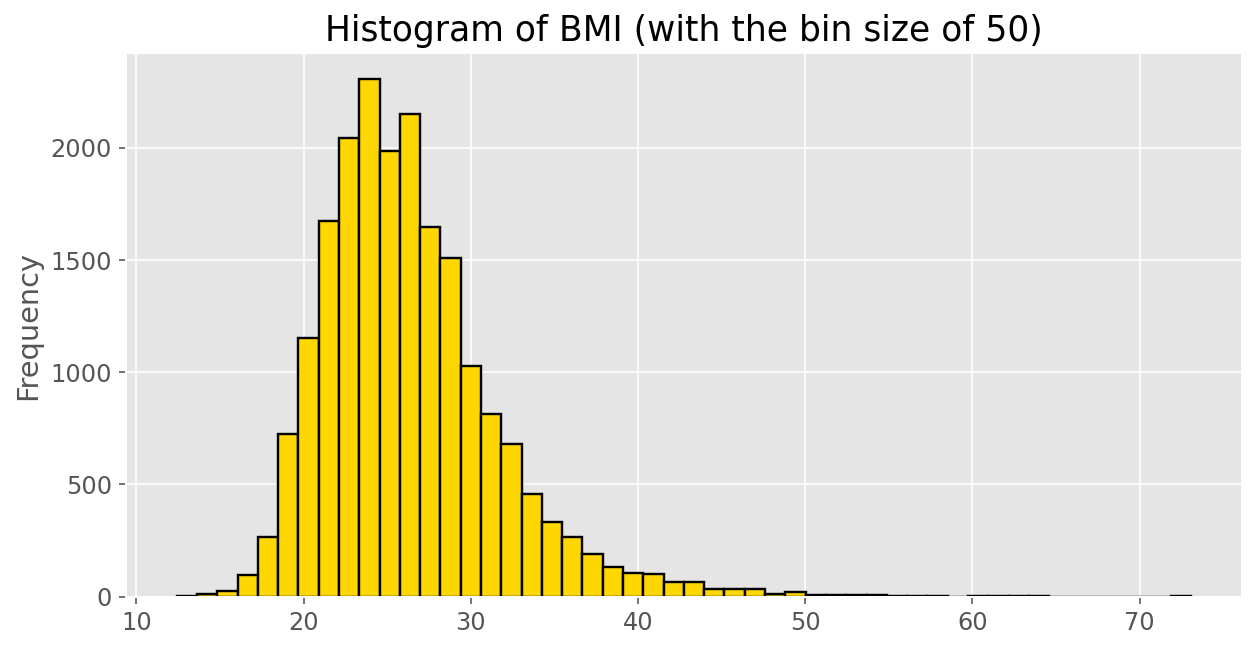

In [42]:
bmi.plot(kind = 'hist', color = 'slateblue', edgecolor = 'black', 
         linewidth = 1.2, title = 'Histogram of BMI')
plt.show(); 

bmi.plot(kind = 'hist', color = 'gold', edgecolor = 'black', 
         linewidth = 1.2, title = 'Histogram of BMI (with the bin size of 50)', bins = 50)
plt.show(); 

How do these two histograms compare?

At this point, we've done a good first pass at analyzing the information in the BRFSS questionnaire. We've found an interesting association between smoking habit and gender, and we can say something about the relationship between people's assessment of their general health and their own BMI. We've also picked up essential computing tools – summary statistics, subsetting, and plots – that will serve us well throughout this course.

---
## On Your Own

<ol>
    <li>Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.</li><br>
    <li> Let's consider a new variable: the difference between desired weight (<code>wtdesire</code>) and current weight (<code>weight</code>). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called <code>wdiff</code>.</li><br>
    <li>What type of data is <code>wdiff</code>? If an observation <code>wdiff</code> is 0, what does this mean about the person's weight and desired weight. What if <code>wdiff</code> is positive or negative?</li><br>
    <li>Describe the distribution of <code>wdiff</code> in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?
</li><br>
    <li>Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.</li><br>
    <li>Now it's time to get creative. Find the mean and standard deviation of <code>weight</code> and determine what proportion of the weights are within one standard deviation of the mean.</li>
</ol>

<div class = "license">
This lab was adapted by David Akman and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com